## Linear Regression Practice

In [2]:
# Importing libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
gdp_le=pd.read_csv('../data/gdp_le.csv')

##### Question 1

Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
a. What coefficients do you get? Interpret the meaning of these coefficents.  
b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
d. Plot the actual values against your model's estimates for the mean life expectancy.  
e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [27]:
# Aggregate the actual data to find average life expectancy per year
gdp_le_agg=gdp_le.groupby('Year').agg({'Life_Expectancy':'mean'}).reset_index()

# Fitting an ordinary least squares model to the data
lr_le_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le_agg).fit()
lr_le_year.params

Intercept   -468.128668
Year           0.267716
dtype: float64

*Based on the coefficients of the least squares regression model, we'd expect to see average global life expectancy rise by about 0.27 years every year. The intercept of -468.14 doesn't have a meaning in the context of our model, since (a) life expectancy cannot be a negative number, and (b) our observations start in 1990, which is very far away from the year 0, so we would want to use caution when extrapolating that far.*

In [28]:
# Adjusting predictor variable to be 'years since 1990', instead of just 'year'
lr_le_year_adjusted = smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le_agg).fit()
lr_le_year_adjusted.params

Intercept         64.626339
I(Year - 1990)     0.267716
dtype: float64

*By adjusting the predictor variable to be 'years since 1990', we get a y-intercept that has real-world meaning. We can see that the predicted average life expectancy in the year 1990 is 64.6 years.*

In [29]:
lr_le_year_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           5.88e-26
Time:                        09:56:54   Log-Likelihood:                -18.371
No. Observations:                  33   AIC:                             40.74
Df Residuals:                      31   BIC:                             43.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6263      0.148    435.844      0.000      64.324      64.929
I(Year - 1990)     0.2677      0.008     33.616      0.000       0.251       0.284
==============================================================================
Omnibus:                       15.367   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.622
Skew:                          -1.337   Prob(JB):                     0.000149
Kurtosis:                       5.380   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Since the confidence intervals for the coefficients do not contain zero and the p-values for the coefficients are small (p=0 for both coefficients), we can conclude that the effect of time on average global life expectancy is statistically significant.*

In [34]:
# Compare actual mean life expectancy per year to the model's estimate

# Generate estimated average life expectancy per year using the least squares regression model
gdp_le_agg['LE_Mean_Estimate'] = lr_le_year_adjusted.predict(gdp_le_agg[['Year']])

gdp_le_agg['Residual'] = lr_le_year_adjusted.resid

gdp_le_agg

,Year,Life_Expectancy,LE_Mean_Estimate,Residual
0,1990,64.745253,64.626339,0.118914
1,1991,65.021276,64.894055,0.127221
2,1992,65.217845,65.161771,0.056074
3,1993,65.218031,65.429487,-0.211456
4,1994,65.339539,65.697203,-0.357665
5,1995,65.956224,65.964919,-0.008696
6,1996,66.200189,66.232635,-0.032447
7,1997,66.437280,66.500352,-0.063071
8,1998,66.556082,66.768068,-0.211986
9,1999,66.916176,67.035784,-0.119608


*The least squares regression model did a very good job of predicting the real-world average life expectancy per year. The predictions were within 1.5 year of the actual average global life expectancy for each year.*

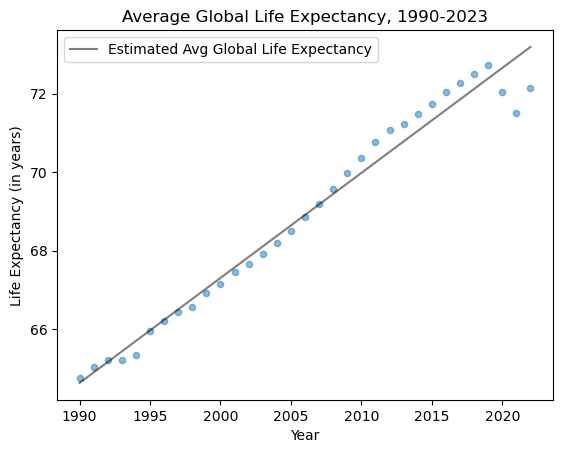

In [39]:
# Plot the estimates against the actual average life expectancies
fig, ax = plt.subplots()
gdp_le_agg.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax, alpha=0.5)
gdp_le_agg.plot(kind='line', x='Year', y='LE_Mean_Estimate', label='Estimated Avg Global Life Expectancy',color='black', ax=ax, alpha=0.5);
plt.title('Average Global Life Expectancy, 1990-2023')
plt.ylabel('Life Expectancy (in years)')
plt.show()

In [40]:
print(f'The r-squared value for the model is {lr_le_year_adjusted.rsquared:.2f}.')

The r-squared value for the model is 0.97.


*Given the plot, the r-squared value of 0.97 makes sense. Most of the observations lie very close to the regression line, so we'd expect an r-squared value close to 1. An r-squared value of 0.97 indicates that the variability in average global life expectancy can be reduced by about 97% by using the predicted values produced by the linear regression model.*

##### Question 2

Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
a. What coefficients do you get? Interpret the meaning of those coefficients.  
b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  
c. Are the coefficients statistically significant?  
d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is \\$50,000\? What about one whose gdp per capita is \\$100,000?   
e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?